# Model Evaluation Techniques in Machine Learning
Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

## 1. K-Fold Cross Validation
Here the original dataset is partitioned into k equal size subsamples, called folds. The k is a user-specified number, usually with 5 or 10 as its preferred value. This is repeated k times, such that each time, one of the k subsets is used as the test set/validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get the total effectiveness of our model.
* **This significantly reduces bias, as we’re using most of the data for fitting, and it also significantly reduces variance, as most of the data is also being used in the test set.**
Procedure :
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

kfold = KFold(n_splits=10, random_state=7)

results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print('Accuracy on val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy on val set: 94.67% (0.06)


* By using cross-validation, we’d be “testing” our machine learning model **(can be Regression or Classification)** in the “training” phase to check for overfitting and to get an idea about how our machine learning model will generalize to independent data. 
* Cross-validation techniques can also be used to compare the performance of different machine learning models on the same data set and can also be helpful in selecting the values for a model’s parameters that maximize the accuracy of the model—also known as parameter tuning.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

kfold = KFold(n_splits=10, random_state=7)

results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print('Accuracy on val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy on val set: 93.33% (0.08)


* **Here we used K-Fold Cross Validation to check the accuracy for two models before we fit the models. So now we can see that Logistic Regression gives us a better accuracy.**

## Classification Models

## 2. Accuracy Score
Calculating accuracy score is a method of finding out how well the model has done on test data. **We use this evaluation method on classification models.** It is the number of correct predictions made as a ratio of all predictions made. 

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print("Testing Accuracy = {:.2f} %".format(result*100))

Testing Accuracy = 92.00 %


## 3. Confusion Matrix
* It is a performance measurement for machine learning **classification problem** where output can be two or more classes.
* It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.
* Terminologies 
    1. TP - Model predicted positive and it’s true.
    2. TN - Model predicted negative and it’s true.
    3. FP - Model predicted positive and it’s false.
    4. FN - Model predicted negative and it’s false.
* Formulae
    1. Recall - Out of all the positive classes, how many did the model actually predict correctly. It should be high as possible.
        * **Recall = TP / (TP + FN)**
    2. Precision - Out of all the positive classes model has predicted correctly, how many are actually positive.
        * **Precision = TP / (TP + FP)**
    3. F-Score - It is the harmonic mean of precision and recall. Useful when both recall and precision matter as The F1 score favors classifiers that have similar precision and recall. 
        * **F-Score = 2*Precision*Recall / (Precision + Recall)**

[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]


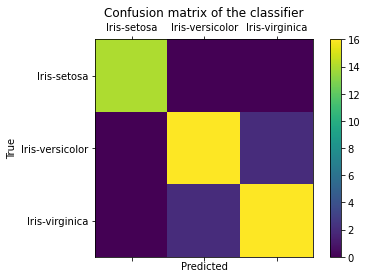

In [5]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import matplotlib.pyplot as plt
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.89      0.89        18
           2       0.89      0.89      0.89        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



## 4. AUC - ROC Curve
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for **binary classification** problems. It is a probability curve that plots the **TPR against FPR** at various threshold values.

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
* **The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.**

When **AUC = 1**, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

When **0.5 < AUC < 1**, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

When **AUC = 0.5**, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.

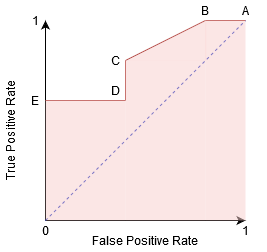
* **Any point on the blue line corresponds to a situation where True Positive Rate is equal to False Positive Rate. All points above this line correspond to the situation where the proportion of correctly classified points belonging to the Positive class is greater than the proportion of incorrectly classified points belonging to the Negative class.**

**1. Binary Classification**

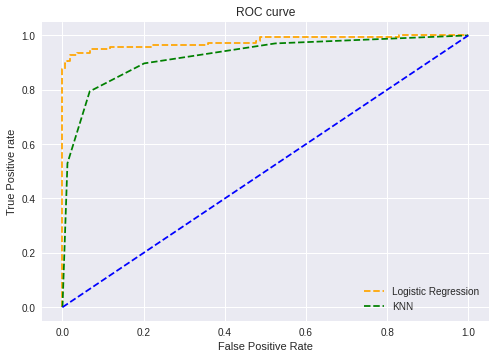

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train, y_train)

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

**AUC Score**

In [9]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print("Logistic Regression AUC Score: ",auc_score1) 
print("KNN AUC Score: ",auc_score2)

Logistic Regression AUC Score:  0.9762374461979914
KNN AUC Score:  0.9233769727403157


**2. Multi-Class Classification**
* If we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

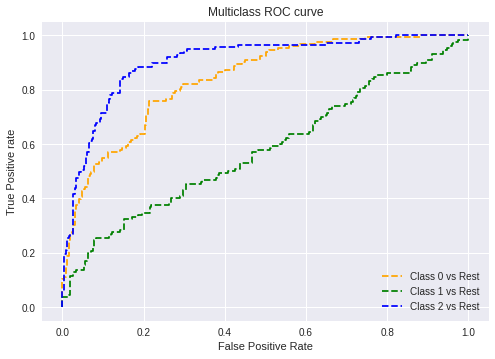

In [11]:
from sklearn.multiclass import OneVsRestClassifier

X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')   

## 5. Logarithmic Loss (aka LogLoss aka Binary Cross-Entropy)
Logarithmic loss (logloss) measures the performance of a classification model **(Binary Classifier)** where the prediction input is a probability value between 0 and 1. Log loss increases as the predicted probability diverges from the actual label. The goal of machine learning models is to minimize this value. 
* **Log Loss quantifies the accuracy of a classifier by penalising false classifications. Minimising the Log Loss is basically equivalent to maximising the accuracy of the classifier.**

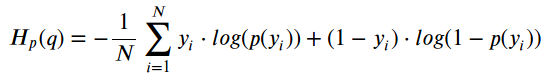


The Log Loss metric takes into account the probabilities underlying your models, and not only the final output of the classification. The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (entropy), so a low Log Loss means a low uncertainty/entropy of your model.

Visual Explanation of LogLoass can be seen [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

In [9]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier


X, y = make_blobs(n_samples=1000, n_features=2, random_state=42,cluster_std=5.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

model = RandomForestClassifier(n_estimators=25)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("Logloss: %.2f" % (log_loss(y_test, y_pred)))

Logloss: 1.52


## Regression Models

In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
dataframe = pd.read_csv(url, delim_whitespace=True)
df = dataframe.values
X = df[:,:-1]
y = df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## 6. MAE, MSE, RMSE
1. MAE = The mean of the absolute value of the errors = $ \frac{1}{n} \sum \limits _{i=1} ^{n} |Actual - Predicted| $
2. MSE = The mean of the squared errors = $ \frac{1}{n} \sum \limits _{i=1} ^{n} {|Actual - Predicted|}^2 $
3. RMSE = The square root of the mean of the squared errors. It represents the standard deviation of the residuals = $ \sqrt {\frac{1}{n} \sum \limits _{i=1} ^{n} {|Actual - Predicted|}^2} $

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model1.fit(X_train, y_train)
model2 = KNeighborsRegressor()
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

print("Linear Regression")
print("MAE test score:", mean_absolute_error(y_test, y_pred1))
print("MSE test score:", mean_squared_error(y_test, y_pred1))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred1)))

print("\nKNN Regression")
print("MAE test score:", mean_absolute_error(y_test, y_pred2))
print("MSE test score:", mean_squared_error(y_test, y_pred2))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred2)))

Linear Regression
MAE test score: 3.4861720700352716
MSE test score: 26.044697337604468
RMSE test score: 5.103400566054409

KNN Regression
MAE test score: 4.524078947368421
MSE test score: 43.26874473684211
RMSE test score: 6.577898200553283


## 7. $R^2$ score (Coefficient of determination)
R-squared is a statistical method that determines the goodness of fit. It measures the strength of the relationship between the dependent and independent variables. The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model. on a scale of 0-100%.

$R^2 = \frac{Explained Variation}{Total Variation}$ = $1 - \frac {\sum\limits _{i=1} ^{n}{(Actual - Predicted)}^2}{{\sum\limits _{i=1}^{n}(Actual} - Mean)}$


In [17]:
from sklearn.metrics import r2_score

print("Linear Regression R-Score:",r2_score(y_test, y_pred1))
print("KNN Regression R-Score:",r2_score(y_test, y_pred2))

Linear Regression R-Score: 0.6788763313849637
KNN Regression R-Score: 0.466508753541911
